In [1]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=8521df26a9e5fec189bf698a6d56b61b013f905b15e81c922b5145ca4f0ced02
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from pyod.models.iforest import IForest
from pyod.models.knn import KNN

In [3]:

data = pd.read_csv('/root/creditcard.csv')


features = ['V2', 'V3', 'V4', 'V11', 'V19', 'V20']
X = data[features]
y = data['Class']

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



iforest = IForest(random_state=42)
knn = KNN()

iforest.fit(X_train)
knn.fit(X_train)



KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


Evaluation for IForest Model:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.01      0.87      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.88      0.49     56962
weighted avg       1.00      0.90      0.95     56962

ROC-AUC Score: 0.9438

Evaluation for KNN Model:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.92      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962

ROC-AUC Score: 0.9648


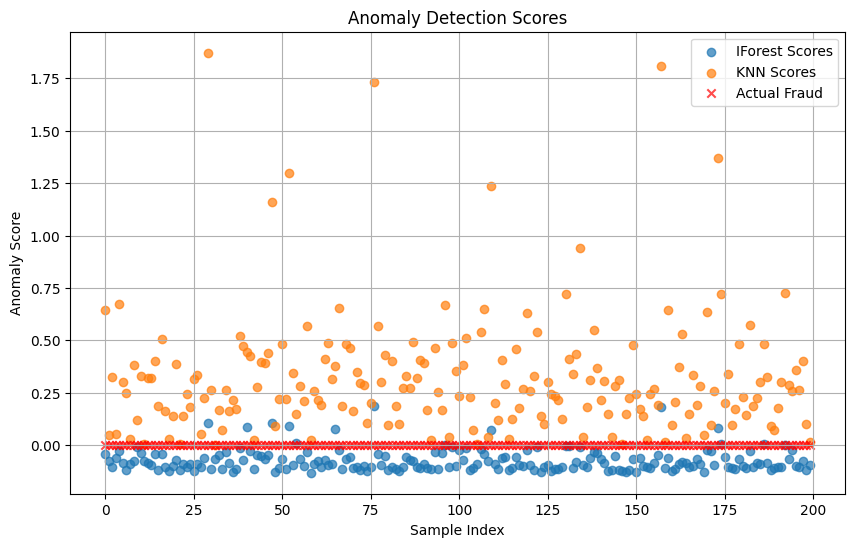

In [5]:

iforest_scores = iforest.decision_function(X_test)
iforest_labels = iforest.predict(X_test)

knn_scores = knn.decision_function(X_test)
knn_labels = knn.predict(X_test)

print("Evaluation for IForest Model:")
print(classification_report(y_test, iforest_labels))
print(f"ROC-AUC Score: {roc_auc_score(y_test, iforest_scores):.4f}")

print("\nEvaluation for KNN Model:")
print(classification_report(y_test, knn_labels))
print(f"ROC-AUC Score: {roc_auc_score(y_test, knn_scores):.4f}")

results = pd.DataFrame({'Actual': y_test.values, 'IForest_Score': iforest_scores, 'KNN_Score': knn_scores})
results['Anomaly_IForest'] = iforest_labels
results['Anomaly_KNN'] = knn_labels

subset = results.sample(200)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(subset)), subset['IForest_Score'], label='IForest Scores', alpha=0.7)
plt.scatter(range(len(subset)), subset['KNN_Score'], label='KNN Scores', alpha=0.7)
plt.scatter(range(len(subset)), subset['Actual'] * max(subset['IForest_Score']), label='Actual Fraud', color='red', alpha=0.7, marker='x')
plt.title('Anomaly Detection Scores')
plt.xlabel('Sample Index')
plt.ylabel('Anomaly Score')
plt.legend()
plt.grid()
plt.show()

